In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
sns.set_style('darkgrid')
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance
import numpy as np
%matplotlib inline

/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## LOGISTIC REGRESSION BASELINE MODEL

In [2]:
kick = pd.read_csv('cleaned_data')

In [3]:
kick.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,number_of_days,pledged_goal_diff,classes_state
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 00:00:00,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,58,-1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01 00:00:00,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,59,-27579.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:00:00,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,44,-44780.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 00:00:00,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,29,-4999.00,0
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 00:00:00,2016-02-26 13:38:27,successful,224,US,52375.0,50000.00,34,2375.00,1


In [4]:
kick.describe()

,ID,backers,usd_pledged_real,usd_goal_real,number_of_days,pledged_goal_diff,classes_state
count,3.314620e+05,331462.000000,3.314620e+05,3.314620e+05,331462.000000,3.314620e+05,331462.000000
mean,1.074288e+09,116.456315,9.939989e+03,4.152286e+04,32.955938,-3.158287e+04,0.403820
std,6.191996e+08,965.732911,9.664561e+04,1.109279e+06,12.714064,1.112869e+06,0.490663
min,5.971000e+03,0.000000,0.000000e+00,1.000000e-02,0.000000,-1.663614e+08,0.000000
25%,5.371698e+08,2.000000,5.000000e+01,2.000000e+03,29.000000,-9.224000e+03,0.000000
50%,1.074686e+09,15.000000,7.875000e+02,5.000000e+03,29.000000,-1.263095e+03,0.000000
75%,1.609865e+09,63.000000,4.609000e+03,1.500000e+04,35.000000,2.980750e+02,1.000000
max,2.147476e+09,219382.000000,2.033899e+07,1.663614e+08,91.000000,1.983899e+07,1.000000


/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


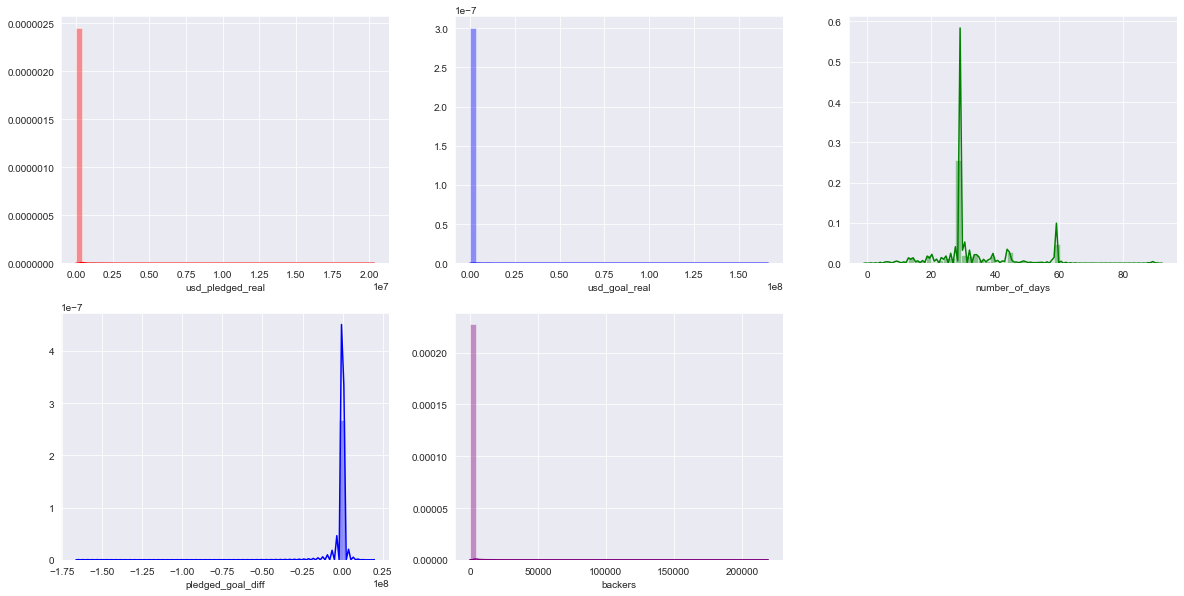

In [5]:
fig = plt.figure(figsize = (20,10))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

sns.distplot(kick['usd_pledged_real'], color = 'red', ax = ax1)
sns.distplot(kick['usd_goal_real'], color = 'blue', ax = ax2)
sns.distplot(kick['number_of_days'], color = 'green', ax = ax3)
sns.distplot(kick['pledged_goal_diff'], color = 'blue', ax = ax4)
sns.distplot(kick['backers'], color = 'purple', ax = ax5)


clearly from the above plot we have to log transform our continuous values for prediction
We have decided to not use the varaibles - usd_pledged, pledged_goal_diff and backers as they will cause data leakage

In [6]:
log_kick = kick.loc[kick['usd_goal_real'] > 1]

In [7]:
log_kick.classes_state.value_counts()

0    197571
1    133579
Name: classes_state, dtype: int64

In [8]:
log_kick.describe()

,ID,backers,usd_pledged_real,usd_goal_real,number_of_days,pledged_goal_diff,classes_state
count,3.311500e+05,331150.000000,3.311500e+05,3.311500e+05,331150.000000,3.311500e+05,331150.000000
mean,1.074401e+09,116.496340,9.947149e+03,4.156198e+04,32.959224,-3.161483e+04,0.403379
std,6.192124e+08,966.141781,9.669047e+04,1.109800e+06,12.709896,1.113393e+06,0.490576
min,5.971000e+03,0.000000,0.000000e+00,1.040000e+00,0.000000,-1.663614e+08,0.000000
25%,5.372342e+08,2.000000,5.000000e+01,2.000000e+03,29.000000,-9.240000e+03,0.000000
50%,1.074887e+09,15.000000,7.900000e+02,5.000000e+03,29.000000,-1.275000e+03,0.000000
75%,1.610028e+09,63.000000,4.614000e+03,1.500000e+04,35.000000,2.970150e+02,1.000000
max,2.147476e+09,219382.000000,2.033899e+07,1.663614e+08,91.000000,1.983899e+07,1.000000


In [9]:
distrib = np.log(log_kick.usd_goal_real)

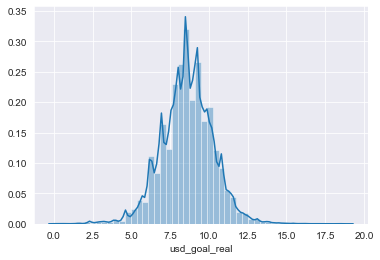

In [10]:
sns.distplot(distrib)

Now we can see from the above plot that we have somewhat of a normal distribution

For the next predictor variable, we use the same method on the number of days.

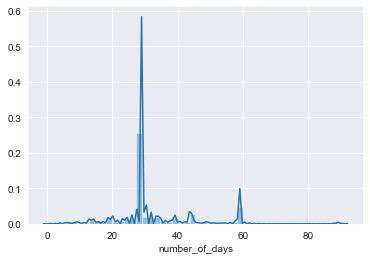

In [11]:
sns.distplot(log_kick['number_of_days'])

The distribution on these variables is not to bad, so we are not going to log-transform this continuous variable.
The next step is to scale our continous variables but before then let's sort the categorical variables

In [12]:
log_kick.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,number_of_days,pledged_goal_diff,classes_state
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 00:00:00,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,58,-1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01 00:00:00,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,59,-27579.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:00:00,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,44,-44780.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 00:00:00,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,29,-4999.00,0
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 00:00:00,2016-02-26 13:38:27,successful,224,US,52375.0,50000.00,34,2375.00,1


using get dummies for the categorical variables.

In [13]:
relevant_columns = ['category', 'main_category', 'currency', 'country']
cat_kick = log_kick[relevant_columns]
dummy_dataframe = pd.get_dummies(cat_kick, drop_first=True)
continuous_df = log_kick[['usd_goal_real', 'number_of_days']]

In [14]:
predictors = pd.concat([continuous_df, dummy_dataframe],axis =1)

In [15]:
predictors.head()

,usd_goal_real,number_of_days,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,category_Apparel,category_Apps,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1533.95,58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000.00,59,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.00,44,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.00,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,50000.00,34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
target = log_kick['classes_state']

Building logistic regression using statsmodels without train_test_split

In [17]:
import statsmodels.api as sm
X = sm.tools.add_constant(predictors)
logit_model = sm.Logit(target, predictors)
result = logit_model.fit()

/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.603452
         Iterations 10


In [18]:
result.summary()

/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          classes_state   No. Observations:               331150
Model:                          Logit   Df Residuals:                   330960
Method:                           MLE   Df Model:                          189
Date:                Thu, 12 Dec 2019   Pseudo R-squ.:                  0.1051
Time:                        15:49:26   Log-Likelihood:            -1.9983e+05
converged:                       True   LL-Null:                   -2.2331e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
usd_goal_real               -1.406e-05   2.14e-07    -65.600      0.000   -1.45e-05   -1.36e-05
number_of_days                 -0.0177      0.000    -56.056      0.000      -0.018      -0.017
category_Academic              -0.4779        nan        nan        nan         nan         nan
category_Accessories            0.4520        nan        nan        nan         nan         nan
category_Action                -0.8932   4.81e+04  -1.86e-05      1.000   -9.44e+04    9.44e+04
category_Animals               -0.1711   4.21e+06  -4.07e-08      1.000   -8.24e+06    8.24e+06
category_Animation             -0.1729        nan        nan        nan         nan         nan
category_Anthologies            1.0477        nan        nan        nan         nan         nan
category_Apparel               -0.3202        nan        nan        nan         nan         nan
category_Apps                  -2.3805      0.104    -22.966      0.000      -2.584      -2.177
category_Architecture          -0.3028        nan        nan        nan         nan         nan
category_Art                    0.1120        nan        nan        nan         nan         nan
category_Art Books              0.7973        nan        nan        nan         nan         nan
category_Audio                 -1.6482      0.180     -9.181      0.000      -2.000      -1.296
category_Bacon                 -0.8367        nan        nan        nan         nan         nan
category_Blues                  0.5175        nan        nan        nan         nan         nan
category_Calendars              0.2348        nan        nan        nan         nan         nan
category_Camera Equipment       0.4730      0.142      3.321      0.001       0.194       0.752
category_Candles               -1.5790        nan        nan        nan         nan         nan
category_Ceramics               0.2107        nan        nan        nan         nan         nan
category_Children's Books       0.0542        nan        nan        nan         nan         nan
category_Childrenswear         -0.3316        nan        nan        nan         nan         nan
category_Chiptune               2.0704        nan        nan        nan         nan         nan
category_Civic Design           0.1634        nan        nan        nan         nan         nan
category_Classical Music        1.2459        nan        nan        nan         nan         nan
category_Comedy                 0.1929        nan        nan        nan         nan         nan
category_Comic Books            0.2622        nan        nan        nan         nan         nan
category_Comics                -0.0846        nan        nan        nan         nan         nan
category_Community Gardens     -0.5809   1.01e+05  -5.78e-06      1.000   -1.97e+05    1.97e+05
category_Conceptual Art        -0.1694        nan        nan        nan         nan         nan
category_Cookbooks             -0.4106        nan        nan        nan  

The r2 value of the model is 0.6 but based on the summary table above we definitely have a lot of categorical dummy variables that are not significant based on alpha value of 0.05 in prediction of the classes.

The next step is to use Sci-kit learn but this time we use train test split and standardize the varaibles using MaxMin scaler

In [19]:
def preprocession(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)
    stdscaler = StandardScaler()
    stdscaler.fit(X_train)
    X_train_scaled = pd.DataFrame(data = stdscaler.transform(X_train), columns = X_train.columns)
    X_test_scaled = pd.DataFrame(data = stdscaler.transform(X_test), columns = X_test.columns)
    return X_train_scaled, X_test_scaled, y_train, y_test


In [20]:
X_train_scaled, X_test_scaled, y_train, y_test = preprocession(predictors,target);

Using the saga solver because I have a large dataset as liblinear is for smaller datasets

In [21]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='saga')
model_log = logreg.fit(X_train_scaled, y_train)
model_log

/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [22]:
y_hat_test = model_log.predict(X_test_scaled)
y_hat_train = model_log.predict(X_train_scaled)


Using the logistic regression to predict classes and checking for the probability of the model predicting the correct failed and successful classes

In [23]:
import numpy as np
# We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros 
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    147321
1     84484
Name: classes_state, dtype: int64
0    0.635538
1    0.364462
Name: classes_state, dtype: float64


The model is performing averagely when using a linear regression, as the classifier is 63% correct on the training data

In [24]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    63148
1    36197
Name: classes_state, dtype: int64
0    0.635643
1    0.364357
Name: classes_state, dtype: float64


When predicting the test data, our model is worse as it can only predict 63% of the data accurately

In [25]:
 print('Accuracy_score:',accuracy_score(y_test, y_hat_test)), print('\n') ,print(classification_report(y_test, y_hat_test))

Accuracy_score: 0.635643464693744


             precision    recall  f1-score   support

          0       0.73      0.62      0.67     59393
          1       0.54      0.66      0.59     39952

avg / total       0.65      0.64      0.64     99345



(None, None, None)

And the accuracy score 63.5%

In [26]:
y_proba_test = model_log.predict_proba(X_test_scaled)

In [27]:
y_proba_test

array([[0.74817511, 0.25182489],
       [0.73125253, 0.26874747],
       [0.43498096, 0.56501904],
       ...,
       [0.62099834, 0.37900166],
       [0.31837014, 0.68162986],
       [0.36354304, 0.63645696]])

In [28]:
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[36736 22657]
 [13540 26412]]


The confusion matrix is a better way to evaluate the model since accuracy doesn't perform a good job on skewed datasets. The row represents the actual class and the columns represent the predicted class.
Judging from this data set we have 36736 True Negatives, 22576 False positives, 13540 false negatives, 26412 True positives

In [29]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat_test)

0.5933880769706025

To view all the metric scores at a glance


In [30]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.5398488506899347
Testing Precision:  0.538262446758646



Training Recall:  0.6614758563234965
Testing Recall:  0.6610933119743693



Training Accuracy:  0.6355384914044132
Testing Accuracy:  0.635643464693744



Training F1-Score:  0.5945053468235836
Testing F1-Score:  0.5933880769706025


In [71]:
# calculating the probability scores


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test[:,1])

In [72]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5092778174571204

In [88]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(round(roc_t['threshold'],2)) 
    
    fig, ax = plt.subplots()
    plt.plot(roc['tpr'])
    plt.plot(roc['1-fpr'], color = 'red')
    plt.xlabel('1-False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    ax.set_xticklabels([])

In [89]:
Find_Optimal_Cutoff(y_test, y_proba_test[:,1])

/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


[0.51]

In [90]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.6973242986291681


The AUC score is 0.69

Text(0, 0.5, 'TPR')

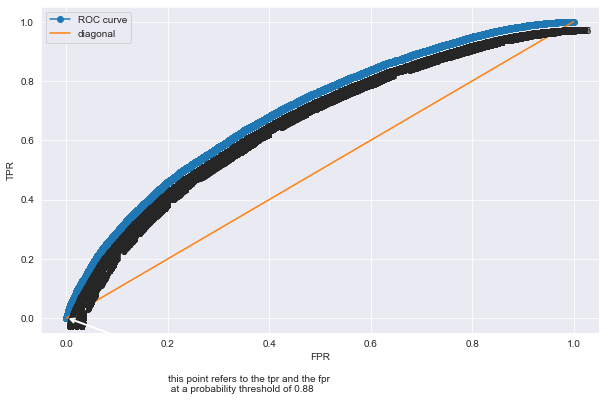

In [93]:
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
for x, y, txt in zip(fpr[::5], tpr[::5], thresholds[::5]):
    plt.annotate(np.round(txt,2), (x, y-0.04))
rnd_idx = 27
plt.annotate('this point refers to the tpr and the fpr\n at a probability threshold of {}'.format(np.round(thresholds[rnd_idx], 2)), 
             xy=(fpr[rnd_idx], tpr[rnd_idx]), xytext=(fpr[rnd_idx]+0.2, tpr[rnd_idx]-0.25),
             arrowprops=dict(facecolor='black', lw=2, arrowstyle='->'),)
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")


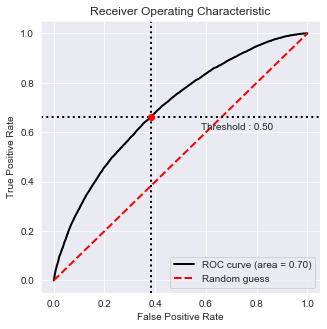

In [97]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_proba_test[:,1], labels=["Class 1", "Class 2"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()







AUC: 0.6973242986291681


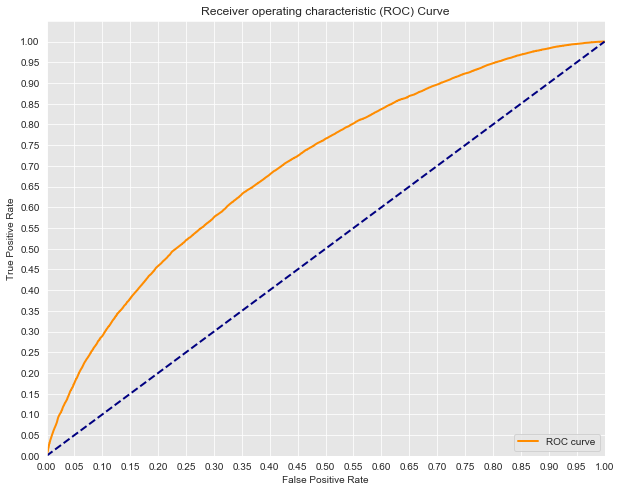

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In final conclusion.. the best AUC score for the Logistic Regression model is 0.69

### CLASS IMBALANCE LOGISTIC REGRESSION

In [ ]:
print('Raw counts: \n')
print(kick['classes_state'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(kick['classes_state'].value_counts(normalize=True))

Approximately 60/40% split between target variable classes

In [ ]:
weights = [None, 'balanced', {1:1.5, 0:1}, {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '1.5 to 1','2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=1e20, class_weight=weight, solver='lbfgs')
    model_log = logreg.fit(X_train_scaled, y_train)
    print(model_log)

    # Predict
    y_hat_train = logreg.predict(X_train_scaled)
    y_hat_test = logreg.predict(X_test_scaled)

    y_score = logreg.fit(X_train_scaled, y_train).decision_function(X_test_scaled)

    fpr1, tpr1, thresholds1 = roc_curve(y_train, y_hat_train)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC test for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    print('AUC train for {}: {}'.format(names[n], auc(fpr1, tpr1)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

As evidenced, class weight can have a significant impact! In this case, typically the heavier we weigh the positive case, the better our classifier appears to be performing until it is weighed more than 2 to 1, which is also generalisable and then perfomance drops again becasue our dataset is not that Imbalanced to begin with.

The optimal value for the AUC is 0.712

Because of the scope of this project and the amount of data points that we have K-Nearest neighbors is not the best classification algorithm to use in this instance to get a good model

### DECISION TREES MODELLING

### BASELINE MODEL

In [ ]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(predictors, target, test_size = 0.3, random_state = 42)

In [ ]:
#using entropy as the initial criterion
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train_clf, y_train_clf)

In [ ]:
y_train_pred = clf.predict(X_train_clf)
y_train_pred

In [ ]:
y_preds_clf = clf.predict(X_test_clf)
y_preds_clf

using different evaluation metrics to assess the performance of the baseline model

In [ ]:
acc_1 = accuracy_score(y_train_clf, y_train_pred ) *100
acc = accuracy_score(y_test_clf,y_preds_clf) * 100
print ('Accuracy for train_score is :{0}'.format(acc_1))
print('Accuracy for test_score is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_train_clf, y_train_pred)
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test_clf, y_preds_clf)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)

print('\nAUC train is :{0}'.format(round(roc_auc1, 2)))


roc_auc2 = auc(false_positive_rate2, true_positive_rate2)

print('\nAUC test is :{0}'.format(round(roc_auc2, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test_clf, y_preds_clf, rownames=['True'], colnames=['Predicted'], margins=True)

AUC score is 0.61 and the accuracy for the baseline model is 63%... the confusion matrix also details that the model was able to predict 44215 True Negatives, 15178 false positives, 21003 False negatives and 18949 True Positives.

Next up- we are going to regrow the tree using the criterion= Gini and random_state = 20..and access the performance

In [ ]:
clf_2 = DecisionTreeClassifier(criterion='gini', random_state = 20)

clf_2.fit(X_train_clf, y_train_clf)

In [ ]:
y_train_pred = clf_2.predict(X_train_clf)
y_preds_clf = clf_2.predict(X_test_clf)

In [ ]:
acc_1 = accuracy_score(y_train_clf, y_train_pred ) *100
acc = accuracy_score(y_test_clf,y_preds_clf) * 100
print ('Accuracy for train_score is :{0}'.format(acc_1))
print('Accuracy for test_score is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_train_clf, y_train_pred)
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test_clf, y_preds_clf)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)

print('\nAUC train is :{0}'.format(round(roc_auc1, 2)))


roc_auc2 = auc(false_positive_rate2, true_positive_rate2)

print('\nAUC test is :{0}'.format(round(roc_auc2, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test_clf, y_preds_clf, rownames=['True'], colnames=['Predicted'], margins=True)

Between the Gini and entropy, the accuracy is 63.55% for gini and 63.50% for entropy.
Although the model predicts True Negatives better by 96 instances and the true instances are less by 50 instances
AUC is still the same

Performing some hyperparamter tuning on the Decision tree model with maximum depth tuning

In [ ]:
clf_3 = DecisionTreeClassifier(criterion='gini',random_state = 20, max_depth = 5)

clf_3.fit(X_train_clf, y_train_clf)

In [ ]:
y_train_pred = clf_3.predict(X_train_clf)
y_preds_clf = clf_3.predict(X_test_clf)

In [ ]:
acc_1 = accuracy_score(y_train_clf, y_train_pred ) *100
acc = accuracy_score(y_test_clf,y_preds_clf) * 100
print ('Accuracy for train_score is :{0}'.format(acc_1))
print('Accuracy for test_score is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_train_clf, y_train_pred)
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test_clf, y_preds_clf)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)

print('\nAUC train is :{0}'.format(round(roc_auc1, 2)))


roc_auc2 = auc(false_positive_rate2, true_positive_rate2)

print('\nAUC test is :{0}'.format(round(roc_auc2, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test_clf, y_preds_clf, rownames=['True'], colnames=['Predicted'], margins=True)

AUC is worse when the max_depth is set to 5 and it is tending towards a worthless model but the error between the model is less and therefore regularisation technique worked as it is not overfitting. but AUC is worse

In [ ]:
# Create DOT data
dot_data = export_graphviz(clf_3, out_file=None, 
                           feature_names=predictors.columns,  
                           class_names=np.unique(target).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

Reducing the max_depth allows us to plot the decsison tree and we can see from the top at the root node tha the most impportant feature the model split on was usd_goal_real....although the gini is not optimised beacuse of the regularisation technique of reducing the max_depth, the best gini scores were prerdicting class 0 better than class 1 which classifying unsuccessful projects than successful projects

To optimise for the best hyperparamters for Max depth and min samples in each leaf node

In [ ]:
model = DecisionTreeClassifier()

param_grid = {'max_depth':range(1,11+1),'min_samples_leaf':[100,200,300]}

opt_model = GridSearchCV(model,param_grid,cv=3,scoring='roc_auc')
opt_model.fit(X_train_clf,y_train_clf)
best_model = opt_model.best_estimator_

opt_model.best_params_

Using the best hyperparameters selected by the GridSearchCV

In [ ]:
clf_best = DecisionTreeClassifier(criterion='gini',random_state = 20, max_depth = 11, min_samples_leaf = 100)

clf_best.fit(X_train_clf, y_train_clf)

In [ ]:
y_train_pred = clf_best.predict(X_train_clf)
y_preds_clf = clf_best.predict(X_test_clf)

In [ ]:
acc_1 = accuracy_score(y_train_clf, y_train_pred ) *100
acc = accuracy_score(y_test_clf,y_preds_clf) * 100
print ('Accuracy for train_score is :{0}'.format(acc_1))
print('Accuracy for test_score is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_train_clf, y_train_pred)
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test_clf, y_preds_clf)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)

print('\nAUC train is :{0}'.format(round(roc_auc1, 2)))


roc_auc2 = auc(false_positive_rate2, true_positive_rate2)

print('\nAUC test is :{0}'.format(round(roc_auc2, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test_clf, y_preds_clf, rownames=['True'], colnames=['Predicted'], margins=True)

In conclusion- the best Decision Tree model is generalisable, does not overfit but the AUC score is not optimal which is leads to underfitting

Plotting the feature importances - 

In [ ]:
def plot_feature_importances(model):
    n_features = X_train_clf.shape[1]
    plt.figure(figsize=(30,30))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_clf.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(clf_best)


USD goal real and number of days are the most important features

In [ ]:
perm = PermutationImportance(clf_best, random_state=1).fit(X_test_clf, y_test_clf)
top_features_df=eli5.formatters.as_dataframe.explain_weights_df(perm, feature_names=list(X_train_clf.columns), target_names=y_train_clf)
top_features_df.head()




In [ ]:
top_f= top_features_df.loc[top_features_df['weight']!=0.000000] 

In [ ]:
list_clf = list(top_f['feature'])
X = predictors[list_clf]
y = target

In [ ]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
clf_optimised = DecisionTreeClassifier(criterion='gini',random_state = 20, max_depth = 11, min_samples_leaf = 100)

clf_optimised.fit(X_train_clf, y_train_clf)

In [ ]:
y_train_pred = clf_optimised.predict(X_train_clf)
y_preds_clf = clf_optimised.predict(X_test_clf)

In [ ]:
acc_1 = accuracy_score(y_train_clf, y_train_pred ) *100
acc = accuracy_score(y_test_clf,y_preds_clf) * 100
print ('Accuracy for train_score is :{0}'.format(acc_1))
print('Accuracy for test_score is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_train_clf, y_train_pred)
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test_clf, y_preds_clf)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)

print('\nAUC train is :{0}'.format(round(roc_auc1, 2)))


roc_auc2 = auc(false_positive_rate2, true_positive_rate2)

print('\nAUC test is :{0}'.format(round(roc_auc2, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test_clf, y_preds_clf, rownames=['True'], colnames=['Predicted'], margins=True)

The same results were still achievied after taking out the important features

### ENSEMBLE METHODS (RANDOM FOREST)

In [ ]:
#using bagged trees as our first ensemble approach and using 20 decision trees
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=11), 
                                 n_estimators=20)

In [ ]:
bagged_tree.fit(X_train_clf, y_train_clf)

In [ ]:
y_train_pred = bagged_tree.predict(X_train_clf)
y_preds_clf = bagged_tree.predict(X_test_clf)

In [ ]:
acc_1 = accuracy_score(y_train_clf, y_train_pred ) *100
acc = accuracy_score(y_test_clf,y_preds_clf) * 100
print ('Accuracy for train_score is :{0}'.format(acc_1))
print('Accuracy for test_score is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_train_clf, y_train_pred)
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test_clf, y_preds_clf)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)

print('\nAUC train is :{0}'.format(round(roc_auc1, 2)))


roc_auc2 = auc(false_positive_rate2, true_positive_rate2)

print('\nAUC test is :{0}'.format(round(roc_auc2, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test_clf, y_preds_clf, rownames=['True'], colnames=['Predicted'], margins=True)

So after using the important features contributing to the model, the accuracy for both train and test improves but the AUC is still relatively the same compared to the other classifiers.

Next up for the random forest

In [ ]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 11)
forest.fit(X_train_clf, y_train_clf)

In [ ]:
y_train_pred = forest.predict(X_train_clf)
y_preds_clf = forest.predict(X_test_clf)

In [ ]:
acc_1 = accuracy_score(y_train_clf, y_train_pred ) *100
acc = accuracy_score(y_test_clf,y_preds_clf) * 100
print ('Accuracy for train_score is :{0}'.format(acc_1))
print('Accuracy for test_score is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_train_clf, y_train_pred)
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test_clf, y_preds_clf)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)

print('\nAUC train is :{0}'.format(round(roc_auc1, 2)))


roc_auc2 = auc(false_positive_rate2, true_positive_rate2)

print('\nAUC test is :{0}'.format(round(roc_auc2, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test_clf, y_preds_clf, rownames=['True'], colnames=['Predicted'], margins=True)

Hyperparameters optimization on Random Forest Classifier

In [ ]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 11],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6, 10]
}

In [ ]:
forest = RandomForestClassifier()

param_grid = {'max_depth':range(1,11+1),'min_samples_leaf':[100,200,300]}

opt_model = GridSearchCV(forest,rf_param_grid,cv=3,scoring='roc_auc')
opt_model.fit(X_train_clf,y_train_clf)
best_model = opt_model.best_estimator_

opt_model.best_params_

In [ ]:
rf_grid_search = GridSearchCV(forest, rf_param_grid, cv=3, n_jobs= -1, return_train_score=True)
rf_grid_search.fit(X_train_clf, y_train_clf)

print(f"Training Accuracy: {rf_grid_search.best_params :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

The Random Forest ensmeble optimised hyperparameters are as above. Now we will train the dataset on this set of parameters

In [ ]:
forest_opt = RandomForestClassifier(n_estimators=100, max_depth= None, criterion='gini', min_samples_leaf= 10,
                                    min_samples_split=10 )
forest_opt.fit(X_train_clf, y_train_clf)

In [ ]:
y_train_pred = forest_opt.predict(X_train_clf)
y_preds_clf = forest_opt.predict(X_test_clf)

In [ ]:
acc_1 = accuracy_score(y_train_clf, y_train_pred ) *100
acc = accuracy_score(y_test_clf,y_preds_clf) * 100
print ('Accuracy for train_score is :{0}'.format(acc_1))
print('Accuracy for test_score is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_train_clf, y_train_pred)
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test_clf, y_preds_clf)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)

print('\nAUC train is :{0}'.format(round(roc_auc1, 2)))


roc_auc2 = auc(false_positive_rate2, true_positive_rate2)

print('\nAUC test is :{0}'.format(round(roc_auc2, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test_clf, y_preds_clf, rownames=['True'], colnames=['Predicted'], margins=True)

This has a higher training accuracy score and does not show signs of overfitting and it is the model that predicts the most True Positives so far, but predicts less True Negatives. Based on the current business model of predicting success. This is our best model so far

### PRINCIPAL COMPONENT ANALYSIS

Foray into whether dimensionality reduction would improve the model.

In [ ]:
ss = StandardScaler()
scaled = ss.fit_transform(X)
from sklearn.decomposition import PCA
fit = PCA()
pca = fit.fit_transform(scaled)
pca

In [ ]:
plt.plot(fit.explained_variance_ratio_)
plt.title("Variance Explained, Given Number of Components")
plt.xlabel("Number of Eigenvectors")
plt.ylabel("Variance Explained")

In [ ]:
print(fit.explained_variance_ratio_)
print("--------------------")
print(fit.explained_variance_ratio_[:15].sum())
print("--------------------")
print("If we use ALL the data we can explain",fit.explained_variance_ratio_[:23].sum()*100," % of our data!")

In [ ]:
pca = pd.DataFrame(pca[:, :15], index=predictors.index)
pca

In [ ]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(pca, target, test_size = 0.3, random_state = 42)

Re-running the random Forest

In [ ]:
forest_opt_pca = RandomForestClassifier(n_estimators=100, max_depth= None, criterion='gini', min_samples_leaf= 10,
                                    min_samples_split=10 )
forest_opt_pca.fit(X_train_clf, y_train_clf)

In [ ]:
y_train_pred = forest_opt_pca.predict(X_train_clf)
y_preds_clf = forest_opt_pca.predict(X_test_clf)

In [ ]:
acc_1 = accuracy_score(y_train_clf, y_train_pred ) *100
acc = accuracy_score(y_test_clf,y_preds_clf) * 100
print ('Accuracy for train_score is :{0}'.format(acc_1))
print('Accuracy for test_score is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_train_clf, y_train_pred)
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test_clf, y_preds_clf)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)

print('\nAUC train is :{0}'.format(round(roc_auc1, 2)))


roc_auc2 = auc(false_positive_rate2, true_positive_rate2)

print('\nAUC test is :{0}'.format(round(roc_auc2, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test_clf, y_preds_clf, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy for train score is the best we have gotten so far without overfitting the model but the AUC has not significantly improved but we defnitely have a good number of True positives compared to the final model

### USING SMOTE TO BALANCE THE CLASSES

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print('Original class distribution: \n')
print(target.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_clf, y_train_clf) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

In [ ]:
#using the resampled data with the Random Forest Classifier

In [ ]:
forest_sam = RandomForestClassifier(n_estimators=100, max_depth= None, criterion='gini', min_samples_leaf= 10,
                                    min_samples_split=10 )
forest_sam.fit(X_train_resampled, y_train_resampled)

In [ ]:
y_train_pred = forest_sam.predict(X_train_resampled)
y_preds_clf = forest_sam.predict(X_test_clf)

In [ ]:
acc_1 = accuracy_score(y_train_resampled, y_train_pred ) *100
acc = accuracy_score(y_test_clf,y_preds_clf) * 100
print ('Accuracy for train_score is :{0}'.format(acc_1))
print('Accuracy for test_score is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_train_resampled, y_train_pred)
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test_clf, y_preds_clf)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)

print('\nAUC train is :{0}'.format(round(roc_auc1, 2)))


roc_auc2 = auc(false_positive_rate2, true_positive_rate2)

print('\nAUC test is :{0}'.format(round(roc_auc2, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test_clf, y_preds_clf, rownames=['True'], colnames=['Predicted'], margins=True)

AUC train and AUC test score has improved just by a 0.1 compared to previous models.

In [ ]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [ ]:
Find_Optimal_Cutoff(target, predictors)